# <a id='toc1_'></a>[Stats and Public Health Part 1](#toc0_)

Sam Celarek  
Data Science   
scelarek@gmail.com  

June 4th, 2023

**Table of contents**<a id='toc0_'></a>    
- [Stats and Public Health Part 1](#toc1_)    
  - [Introduction:](#toc1_1_)    
  - [Methodology:](#toc1_2_)    
  - [Part 1 - Basic Data Wrangling](#toc1_3_)    
    - [1.1 What is the Shape of the dataframe?](#toc1_3_1_)    
    - [1.2 Convert 'Date' column to datetime type](#toc1_3_2_)    
    - [1.3 Analysis of Two Numeric and Two Categorical columns: What are storing? How are they distributed?](#toc1_3_3_)    
    - [1.4a Duplicate Columns](#toc1_3_4_)    
    - [1.4b Duplicated Row Assessment:](#toc1_3_5_)    
    - [1.5a Handling Null Values](#toc1_3_6_)    
    - [1.5b Other Data Cleaning Tasks Performed](#toc1_3_7_)    
  - [Part 2 - Basic EDA](#toc1_4_)    
    - [2.1 Visual Exploration: Mosquito Number and Date](#toc1_4_1_)    
  - [Part 3 - Advanced EDA](#toc1_5_)    
    - [3.1 Visual Exploration:  Mosquito Species and WNV Prevalence](#toc1_5_1_)    
    - [3.2 Visual Exploration: Number of Mosquitos Caught and Trap Type.](#toc1_5_2_)    
    - [3.3 Visual Exploration: Timeline and Geographical Heatmap of Prevalence](#toc1_5_3_)    
      - [3.3.1 Timeline of Yearly West Nile Virus Prevalence](#toc1_5_3_1_)    
      - [3.3.2 Chloropleth Map of Prevalence by Zipcode](#toc1_5_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction:](#toc0_)

This project focuses on analyzing mosquito tracking data from the city of Chicago, Illinois, spanning from 2008 to 2019. The dataset offers valuable insights into mosquito populations and the prevalence of West Nile Virus (WNV) in the city. By conducting exploratory data analysis and data wrangling in python, we aim to visualize trends and uncover patterns that can contribute to effective strategies for WNV prevention and control.

## <a id='toc1_2_'></a>[Methodology:](#toc0_)

First, import all the relevant libraries and load the data into a dataframe.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# Geoplot Libraries
import time
from geopy.geocoders import Nominatim
from tqdm.auto import tqdm, trange
import geopandas as gpd

# initialize styling params
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

# Load the data
dirty_mosq_data = pd.read_csv('Data/mosquito_data.csv')

# Display the first few rows of the dataframe
dirty_mosq_data.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [2]:
# Pre-Cleaning Copy
mosq_df = dirty_mosq_data.copy()

## <a id='toc1_3_'></a>[Part 1 - Basic Data Wrangling](#toc0_)


### <a id='toc1_3_1_'></a>[1.1 What is the Shape of the dataframe?](#toc0_)

The dataframe has 13 columns and 18495 rows.

In [3]:
print(mosq_df.shape)

# Look at the information and descriptive statistics of the dataframe
dirty_mosq_data.info()
dirty_mosq_data.describe()

(18495, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


### <a id='toc1_3_2_'></a>[1.2 Convert 'Date' column to datetime type](#toc0_)

The "Date" column previously had a string type, but using the `pd.to_datetime` function let me convert it seamlessly to the datetime type. This is because it had string data in a format that was ready to convert. 

In [4]:
mosq_df['Date'] = pd.to_datetime(mosq_df.Date)

mosq_df['Date'].head()

0   2019-09-26 00:09:00
1   2019-09-26 00:09:00
2   2019-09-26 00:09:00
3   2019-09-26 00:09:00
4   2019-09-26 00:09:00
Name: Date, dtype: datetime64[ns]

### <a id='toc1_3_3_'></a>[1.3 Analysis of Two Numeric and Two Categorical columns: What are storing? How are they distributed?](#toc0_)


Two categorical columns are 'Trap Type' and 'Species'. These columns store information about the type of trap used to catch mosquitos and the species of mosquitos found in the trap at the time of collection. 

The 4 unique 'Trap types' categories are: 'GRAVID', 'OVI', 'SENTINEL', and 'CDC' and described further in the table below. 

| Trap Type   | Description                                                     |
|-------------|-----------------------------------------------------------------|
| Gravid Traps | Lure pregnant female mosquitoes using attractive oviposition water |
| CDC         | Use a light bulb to attract mosquitoes                          |
| Sentinel    | Uses a lure and can use CO2 to simulate humans                   |
| Ovi         | Short for Oviposition, place oviposition water for females to lay eggs |

[Source](https://www.kaggle.com/code/nicolefijman/west-nile-virus-in-chicago?scriptVersionId=87426077&cellId=15)

The four 'Species' of mosquito are: Culex restuans, Culex pipiens, Culex territans, and Culex salinarius.

- Culex restuans is the most common species in this data set, with a count of 11,866. This suggests that this species is either more prevalent in the environment or is more easily captured/identified compared to the other species.

- The second most common species is Culex pipiens, with a count of 5,486. This species is less than half as common as Culex restuans in this data set.

- Culex territans is considerably less common than the first two species, with a count of 917. This may suggest that this species has a lower population, or that it is less likely to be captured or identified for some reason.

- The least common species in this data set is Culex salinarius, with a count of only 226. This species may be the least prevalent in the environment, or the least likely to be captured or identified.

In [5]:
# Assess which columns had only a limited variety of unique values. 
# Usually columns with <10 unique values are categorical.
mosq_df.nunique()

Year                 13
Week                 21
Address Block       154
Block                87
Trap                190
Trap type             4
Date                298
Mosquito number      50
Mosquito ID           4
WNV Present           2
Species               4
Lat                2500
Lon                2500
dtype: int64

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

Text(0.5, 1.0, 'Distribution of Trap Type')

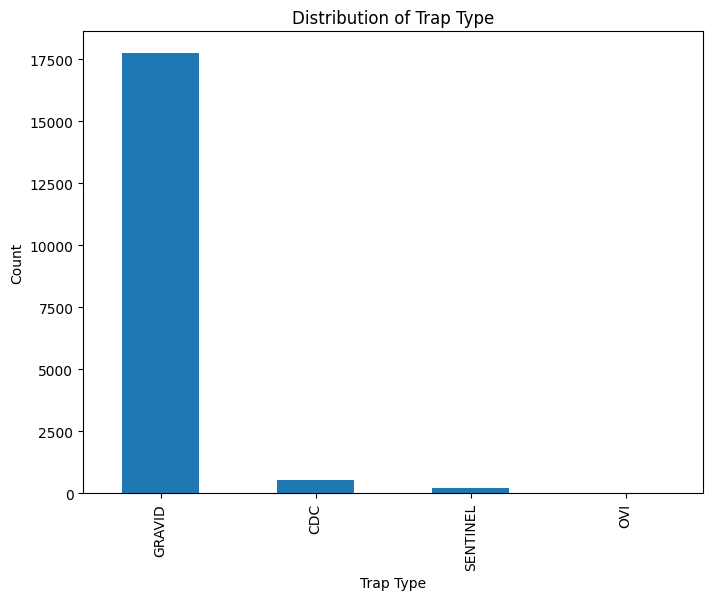

In [6]:
#1st categorical analysis
display(mosq_df['Trap type'].value_counts()) 
mosq_df['Trap type'].value_counts().plot(kind='bar')

plt.xlabel('Trap Type')
plt.ylabel('Count')
plt.title('Distribution of Trap Type')

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

Text(0.5, 1.0, 'Distribution of Species of Mosquitoes')

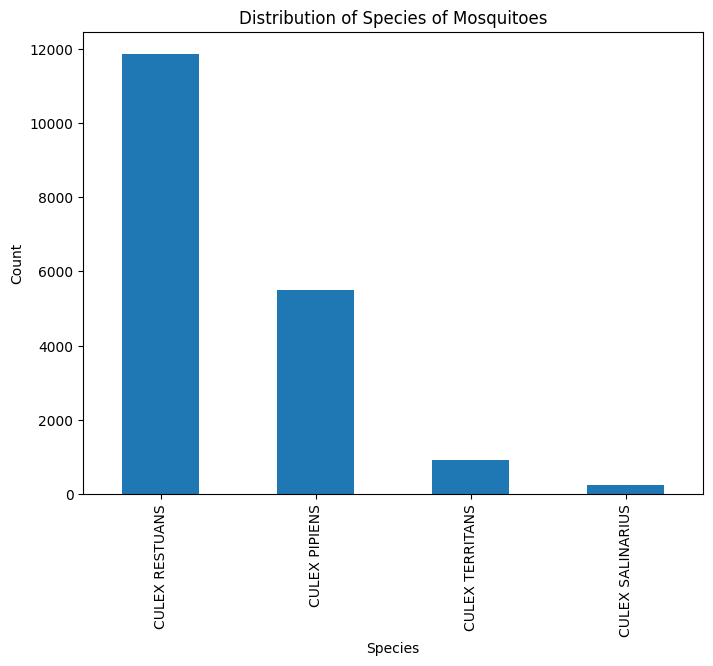

In [7]:

#2nd categorical analysis
display(mosq_df['Species'].value_counts())
mosq_df['Species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')

plt.title('Distribution of Species of Mosquitoes')

The two numerical columns I analyzed were 'Mosquito Number' and 'Longitude'.

'Mosquito number' is the number of mosquitos in each sample is going to be a very important statistic for my analysis. The 'mosquito number' is widely distributed about the mean of 10, with a standard deviation of ~13.5. It is also a very left skewed distribution. 

The 'Lon' column represented Longitude values, which indicates how West or East the trap is located. The mean longitude is -87.69, which is slightly West of the center of Chicago. The standard deviation is 0.08, which is very small and indicates that the traps are located very close to each other. 

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

Text(0.5, 1.0, 'Distribution of Mosquito Number')

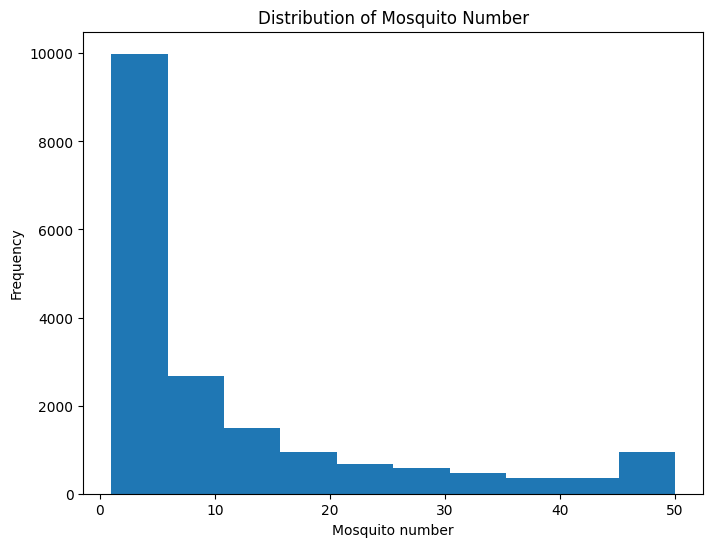

In [8]:
#1st numerical analysis

display(mosq_df['Mosquito number'].describe())

mosq_df['Mosquito number'].plot(kind='hist', title='Mosquito Number Histogram')
plt.xlabel('Mosquito number')
plt.ylabel('Frequency')
plt.title('Distribution of Mosquito Number')

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

Text(0.5, 1.0, 'Distribution of Longitude')

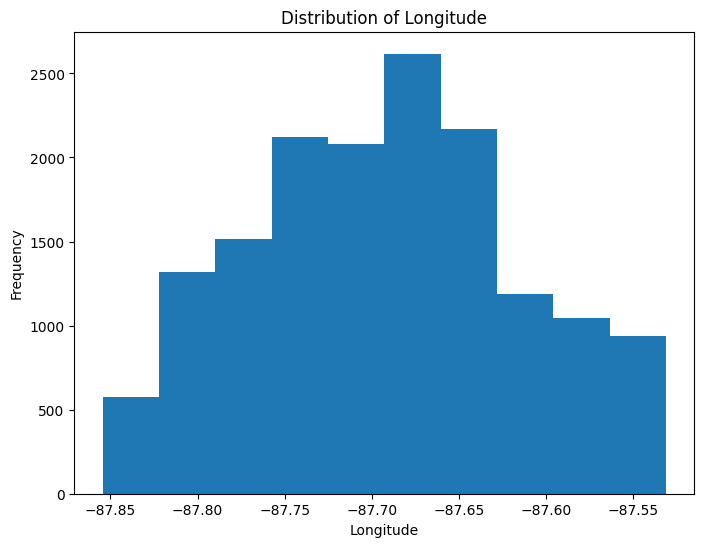

In [9]:

#2nd numerical analysis

display(mosq_df['Lon'].describe())

mosq_df['Lon'].plot(kind='hist')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude')


### <a id='toc1_3_4_'></a>[1.4a Duplicate Columns](#toc0_)




Upon examining the dataset, I found no overtly duplicated columns. However, certain columns contained information that was fully encompassed by others. For instance, 'Mosquito ID' mirrored 'Mosquito Species', 'Block' corresponded to the initial two digits of the 'Address Block' column, and 'Year' was contained in the 'Date' column. The process demonstrating these equivalences is detailed below.

Interestingly, the 'Week' column in the original dataset **did not align** with the week information derived from the 'Date' column. This discrepancy could be attributed to differences in how weeks are calculated in pandas versus the 'Week' column. Given this inconsistency, I opted to utilize the 'Date' column for my analysis. In a professional setting, it would be prudent to reach out to the data curator to gain a better understanding of this discrepancy.


In [10]:
mosq_df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

Mosquite ID was redundant.

In [11]:
# This value counts function ensures that every combination of mosquito ID 
# has a 1-to-1 match in species that fully explains the changes in Mosquito ID
mosq_df[['Mosquito ID', 'Species']].value_counts()

Mosquito ID  Species         
Res          CULEX RESTUANS      11866
Pip          CULEX PIPIENS        5486
Ter          CULEX TERRITANS       917
Sal          CULEX SALINARIUS      226
dtype: int64

Block was redundant.

In [12]:
# I made a new column extracting the block number from the address block, then compared it to the block number
mosq_df['new_block'] = mosq_df['Address Block'].str.extract(r'(\d+)', expand=True).astype('int')

# the new column was a perfect match for the block column, meaning it could be removed without any loss of information
(mosq_df.new_block == mosq_df.Block).mean()

1.0

Year was redundant.

In [13]:
# The year column was completely explained by the date column
(mosq_df.Year == mosq_df.Date.dt.isocalendar().year).mean()

1.0

Week was not redundant.

In [14]:
# Week compared to Data.dt.week only matched 2/3 of the time.

(mosq_df.Week == mosq_df.Date.dt.isocalendar().week).mean()

0.6712084347120844

In [15]:
# update the dataframe to remove the columns that are no longer needed
mosq_df = mosq_df.drop(['Mosquito ID', 'Block', 'Year', 'new_block'], axis=1)



### <a id='toc1_3_5_'></a>[1.4b Duplicated Row Assessment:](#toc0_)

I also checked for regular duplicated data here and found 658 duplicated entries or 3.56%. I originally considered dropping these entries from my dataframe because they were small and seemed like an error. However after some investigation, including grouping and summing all entries and looking at specific overflow entries, I decided that duplicate rows were likely the 'overflow' entries that were mentioned in the data dictionary. Work is shown below.

In [16]:
# Duplicated data check
mosq_df.duplicated().sum(), mosq_df.duplicated().count(), mosq_df.duplicated().mean()


(658, 18495, 0.035577183022438494)

In [17]:
# Preliminary investigation
mosq_df[mosq_df.duplicated()].info()
mosq_df[mosq_df.duplicated()].nunique()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 15495 to 18494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             658 non-null    int64         
 1   Address Block    658 non-null    object        
 2   Trap             658 non-null    object        
 3   Trap type        658 non-null    object        
 4   Date             658 non-null    datetime64[ns]
 5   Mosquito number  658 non-null    int64         
 6   WNV Present      658 non-null    object        
 7   Species          658 non-null    object        
 8   Lat              0 non-null      float64       
 9   Lon              0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 56.5+ KB


Week               15
Address Block       8
Trap               25
Trap type           2
Date               84
Mosquito number    47
WNV Present         1
Species             3
Lat                 0
Lon                 0
dtype: int64

In [18]:
# Further investigation into the duplicate data. 
# I found that the duplicates were often used to record mosquito numbers for 'overflow' trap entries

groupby_mosq_num = mosq_df.groupby(['Date', 'Week', 'Address Block', 'Lat', 'Lon', 'Trap', 'Trap type', 'Species', 'WNV Present'])['Mosquito number']\
    .agg(['sum', 'count', 'mean']).sort_values('count').reset_index().copy()
groupby_mosq_num



,Date,Week,Address Block,Lat,Lon,Trap,Trap type,Species,WNV Present,sum,count,mean
0,2007-05-29 00:05:00,21,119XX S PEORIA ST,41.677032,-87.644465,T091,GRAVID,CULEX RESTUANS,negative,1,1,1.00
1,2015-07-02 00:07:00,26,71XX N HARLEM AVE,42.010643,-87.806797,T233,GRAVID,CULEX RESTUANS,negative,36,1,36.00
2,2015-07-02 00:07:00,26,77XX S EBERHART AVE,41.754148,-87.612721,T080,GRAVID,CULEX RESTUANS,negative,6,1,6.00
3,2015-07-02 00:07:00,26,82XX S KOSTNER AVE,41.742670,-87.731550,T225,GRAVID,CULEX RESTUANS,negative,11,1,11.00
4,2015-07-02 00:07:00,26,89XX S CARPENTER ST,41.731447,-87.649722,T159,GRAVID,CULEX RESTUANS,negative,2,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
15215,2007-08-08 00:08:00,31,24XX E 105TH ST,41.704687,-87.564236,T128,CDC,CULEX PIPIENS,negative,155,4,38.75
15216,2007-08-28 00:08:00,34,101XX S STONY ISLAND AVE,41.710542,-87.584559,T138,CDC,CULEX PIPIENS,negative,159,4,39.75
15217,2007-08-16 00:08:00,32,24XX E 105TH ST,41.704687,-87.564236,T128,CDC,CULEX PIPIENS,negative,171,4,42.75
15218,2007-08-17 00:08:00,32,101XX S STONY ISLAND AVE,41.710542,-87.584559,T138,CDC,CULEX PIPIENS,negative,158,4,39.50


In [19]:
# Investigating Specific Data Entry which revealed that overflow entries where given a variety of mosquito numbers, not just 50.

mosq_df[mosq_df['Address Block'] == '101XX S STONY ISLAND AVE']\
    [mosq_df['Trap'] == 'T138'][mosq_df['Species'] == 'CULEX PIPIENS']\
    [mosq_df['Trap type'] == 'CDC'][mosq_df['Date']== '2007-08-28 00:08:00']
    

    

C:\Users\Samsickle\AppData\Local\Temp\ipykernel_3644\1308677809.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mosq_df[mosq_df['Address Block'] == '101XX S STONY ISLAND AVE']\


,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
14182,34,101XX S STONY ISLAND AVE,T138,CDC,2007-08-28 00:08:00,50,negative,CULEX PIPIENS,41.710542,-87.584559
14183,34,101XX S STONY ISLAND AVE,T138,CDC,2007-08-28 00:08:00,50,positive,CULEX PIPIENS,41.710542,-87.584559
14185,34,101XX S STONY ISLAND AVE,T138,CDC,2007-08-28 00:08:00,37,negative,CULEX PIPIENS,41.710542,-87.584559
14199,34,101XX S STONY ISLAND AVE,T138,CDC,2007-08-28 00:08:00,26,negative,CULEX PIPIENS,41.710542,-87.584559
14208,34,101XX S STONY ISLAND AVE,T138,CDC,2007-08-28 00:08:00,46,negative,CULEX PIPIENS,41.710542,-87.584559



### <a id='toc1_3_6_'></a>[1.5a Handling Null Values](#toc0_)

There were 2924 null values in both the 'Lat' and 'Lon' columns and always accompanied each other. Since null values only originated from 10 separate locations, I decided to impute the 'Lat'/'Lon' values of the locations given by the 'Address Block' column from google maps. 

In [20]:
mosq_df.info()

# total of null values in lon
display(mosq_df.Lon.isna().sum())

# This shows that the lat and long are always null together, so I need to add them both to each missing entry.

(mosq_df.Lon.isna() == mosq_df.Lat.isna()).mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             18495 non-null  int64         
 1   Address Block    18495 non-null  object        
 2   Trap             18495 non-null  object        
 3   Trap type        18495 non-null  object        
 4   Date             18495 non-null  datetime64[ns]
 5   Mosquito number  18495 non-null  int64         
 6   WNV Present      18495 non-null  object        
 7   Species          18495 non-null  object        
 8   Lat              15571 non-null  float64       
 9   Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1.4+ MB


2924

1.0

In [21]:
# addresses which always had null entries
mosq_df.groupby('Address Block').Lat.count()[mosq_df.groupby('Address Block').Lat.count() == 0]


Address Block
100XX W OHARE            0
100XX W OHARE AIRPORT    0
115XX S AVENUE L         0
30XX S HOYNE             0
43XX N ASHLAND           0
4XX W 127TH              0
65XX N OAK PARK AVE      0
79XX S CHICAGO           0
81XX S ASHLAND           0
98XX S AVENUE G          0
Name: Lat, dtype: int64

In [22]:
# manual lookup of each address block with missing lat/long

mappings = {'100XX W OHARE': (41.9790687, -87.90656950), 
            '100XX W OHARE AIRPORT': (41.9790687, -87.9065695),
            '115XX S AVENUE L': (41.686664, -87.536357),
            '30XX S HOYNE': (41.836666, -87.677742),
            '43XX N ASHLAND': (41.9600993, -87.6693065),
            '4XX W 127TH': (41.663326, -87.632089),
            '65XX N OAK PARK AVE': (41.999756, -87.795582),
            '79XX S CHICAGO': (41.750764, -87.584487),
            '81XX S ASHLAND': (41.7465690404, -87.6634408553),
            '98XX S AVENUE G': (41.717813062, -87.53162274)}

# creating dictionaries for lat and long
latitudes = {k: v[0] for k, v in mappings.items()}
longitudes = {k: v[1] for k, v in mappings.items()}


In [23]:
# If lat/long is null, then this takes the address block and maps it to the corresponding lat/long. 
# I used the combine first function which allows me to replace any nans with the values in the other column.

mosq_df['Lon'] = mosq_df['Address Block'].map(longitudes).combine_first(mosq_df['Lon'])
mosq_df['Lat'] = mosq_df['Address Block'].map(latitudes).combine_first(mosq_df['Lat'])


In [24]:
mosq_df.info() # fixed df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             18495 non-null  int64         
 1   Address Block    18495 non-null  object        
 2   Trap             18495 non-null  object        
 3   Trap type        18495 non-null  object        
 4   Date             18495 non-null  datetime64[ns]
 5   Mosquito number  18495 non-null  int64         
 6   WNV Present      18495 non-null  object        
 7   Species          18495 non-null  object        
 8   Lat              18495 non-null  float64       
 9   Lon              18495 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1.4+ MB


### <a id='toc1_3_7_'></a>[1.5b Other Data Cleaning Tasks Performed](#toc0_)

I also did some other data cleaning tasks that I thought would be useful for my analysis. This was mostly fixing data types, and cleaning up column names.

In [25]:
# this makes 'wnv present' a boolean
mosq_df['WNV Present'] = mosq_df['WNV Present'].map({'positive': True, 'negative': False}).astype('bool')

# this makes the 'trap type' and 'species' a category
mosq_df['Trap type'] = mosq_df['Trap type'].astype('category')

mosq_df['Species'] = mosq_df['Species'].astype('category')

# this cleans up all my columns and makes them uniform
mosq_df.columns = [i.lower().replace(" ", "_") for i in mosq_df.columns]


## <a id='toc1_4_'></a>[Part 2 - Basic EDA](#toc0_)



### <a id='toc1_4_1_'></a>[2.1 Visual Exploration: Mosquito Number and Date](#toc0_)


In [26]:
# Calculate weekly statistics
weekly_stats = mosq_df.groupby(mosq_df.date.dt.isocalendar().week)["mosquito_number"].sum()
weekly_stats.tail()


week
37    7001
38    4821
39    2559
40    1110
41     200
Name: mosquito_number, dtype: int64

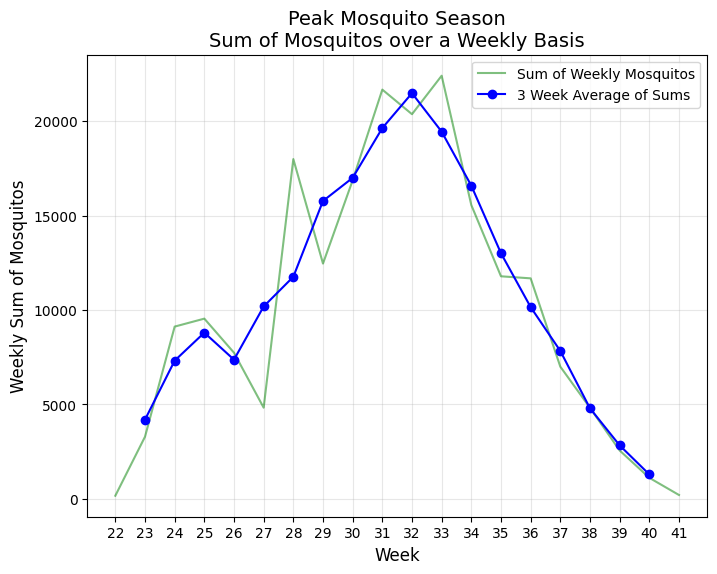

In [27]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot the line
plt.plot(weekly_stats, color='green', label='Sum of Weekly Mosquitos', alpha=.5)
plt.plot(weekly_stats.rolling(3, center=True).mean(), marker='o', color='blue', label='3 Week Average of Sums')

# Customize the plot appearance
plt.yticks(fontsize=10)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Weekly Sum of Mosquitos', fontsize=12)
plt.title('Peak Mosquito Season\nSum of Mosquitos over a Weekly Basis', fontsize=14)
plt.grid(True, alpha=.3)
plt.xticks(list(weekly_stats.index), weekly_stats.index)
plt.legend()

# Show the plot
plt.show()


The data indicates that the peak mosquito activity occurs during weeks 31 to 33 across all years of mosquito collection. This crucial information can guide public health initiatives. During these weeks, we should intensify efforts to encourage the public to use bug spray, avoid mosquito breeding areas, and be vigilant about symptoms of mosquito-borne illnesses. This targeted approach can help reduce the risk of disease transmission and protect community health.


## <a id='toc1_5_'></a>[Part 3 - Advanced EDA](#toc0_)



### <a id='toc1_5_1_'></a>[3.1 Visual Exploration:  Mosquito Species and WNV Prevalence](#toc0_)

The **prevalence** of the West Nile Virus (WNV) refers to the proportion of mosquitoes carrying the virus. In a typical scenario, prevalence is computed at the individual level. For instance, if we test 100 people and 10 test positive for COVID-19 (assuming a sensitivity and specificity of ~100%), then the prevalence is 10%. 

However, in this case, we are dealing with **batch samples** of mosquitoes. A batch tests positive for WNV if **any** mosquito in the batch is infected. Conversely, a batch tests negative **only if all mosquitoes in the batch are free of WNV**. This means probability of seeing a negative batch ($P(X=0)$) is the **conjunctive probability** of every mosquito in that batch being negative $(1-p(x))^{(n-0)}$! 

Another way to think about this is that the WNV test results are **binomial** - they can only be positive or negative. This allows us to use the binomial distribution to model the probability of every individual in a batch testing negative.

The binomial probability distribution is given by the formula:

$$P(X=k) = C(^n_k) * (p^k) * ((1-p)^{n-k})$$

where:
- $P(X=k)$ is the probability of $k$ many mosquitos being positive for WNV in $n$ mosquitos trials,
- $C(^n_k)$ is the number of combinations of $n$ items taken $k$ at a time,
- $p$ is the probability of a single mosquito trial being positive for WNV,
- $n$ is the number of mosquitos trials in each batch.

Since we only looking at probability of cases where every individual is negative or $k=0$, we can simplify the formula to:

$$P(X=0) = C(^n_0) * (p^0) * ((1-p)^{n-0})$$
$$P(X=0) = 1 * 1 * ((1-p)^{n})$$
$$P(X=0) = (1-p)^{n}$$

Now we just need to solve for prevalence or $p$ using a little algebra:

$$P(X=0)^{1/n} = 1-p$$
$$1 - P(X=0)^{1/n} = p$$

Now that we have the equation to solve for prevalence, we just need to find the $P(X=0)$ for each batch size. To do this we group the data by **each batch size** and **each species**, then compute the WNV prevalence for each group. Substituting this batch prevalence into the above equation along with the corresponding batch size ($n$), we can estimate the individual prevalence. This approach allows us to explore the relationship between mosquito species and WNV prevalence. 

In [28]:

# group by species and mosquito number, calculate proportion of wnv_present
prev_df = mosq_df.groupby(['mosquito_number', 'species'])['wnv_present'].agg(['mean', 'count', 'std']).reset_index().dropna()

prev_df = prev_df.dropna()

# then calculate prevalence and prevalence of not occurring
prev_df['not_prevalence'] = (1-prev_df['mean'])**(1/prev_df['mosquito_number'])

prev_df['prevalence'] = 1-prev_df.not_prevalence

prev_df.tail(5)



,mosquito_number,species,mean,count,std,not_prevalence,prevalence
189,48,CULEX RESTUANS,0.529412,51,0.504101,0.984419,0.015581
192,49,CULEX PIPIENS,0.583333,12,0.514929,0.982292,0.017708
193,49,CULEX RESTUANS,0.411765,34,0.499554,0.989229,0.010771
196,50,CULEX PIPIENS,0.702326,215,0.458303,0.976056,0.023944
197,50,CULEX RESTUANS,0.513889,432,0.500387,0.985677,0.014323


Once I estimated the prevalence for each batch of each species, the next step was to aggregate these means to derive a single mean for each species. This process was nuanced due to the fact that some batches contained more samples than others (eg: batch size of 50 has 432 samples) and some batches had more individuals than other (eg: batch size of 50 has 50x more individuals than a batch size of 1). To address this, I calculated a **weighted mean** for prevalence, where the weights were determined by the number of samples in each batch multiplied by the batch size. The formulas for the weighted mean and the weights is given by:

The weight for each individual batch mean:  
$w_i = b_i * s_i$

The weighted mean:  
$\bar{x} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$

Where:

- $b_i$ is the batch size
- $s_i$ is the number of samples in each batch
- $x_i$ is the proportion of WNV for each sample

This weighted mean, I believe, accurately incorporates all of the available information to compute a representative prevalence for each respective mosquito species.


The next question to address was: **how close is the population mean to this sample mean?** To answer this, I calculated a confidence interval using the standard error. 

First, I computed a **weighted standard deviation**, then divided it by the square root of the number of batches I had for that species to get the **weighted standard error**. Then I calculated the **95% Confidence Interval**, which is the range of values where we are 95% sure that the true average for all mosquitoes falls within. Finally, I plotted the mean prevalence of WNV for each species, including their respective standard error bars to the **95% Confidence Interval** to illustrate their respective uncertainty. This process of determining a confidence interval helps to better illustrate the uncertainty about each species' actual population prevalence, providing a more complete picture of the data for public health officials to act on. Some of the formulas used are below:

The weighted standard deviation:  
$s_w = \sqrt{\frac{\sum_{i=1}^{n} w_i (x_i - \bar{x})^2}{\sum_{i=1}^{n} w_i}}$


The weighted standard error:  
$SE_w = \frac{s_w}{\sqrt{n}}$  
where $n$ is the number of batches for that species. 

The 95% Confidence Interval:  
$ CI_{\alpha=0.05} = \bar{x} \pm 1.96 * SE_w$



In [29]:
# weighted means function

def weighted_func(group):
    # variable setup
    proprtion_prev = group['prevalence']
    total_weight = group['count'] * group['mosquito_number']
    
    #weighted mean
    weighted_mean = np.average(proprtion_prev, weights=total_weight)

    #weighted variance
    weighted_variance = np.average((proprtion_prev - weighted_mean)**2, weights=total_weight)
    weighted_std_dev = np.sqrt(weighted_variance)
    
    #weighted standard error
    weighted_std_err = weighted_std_dev / len(proprtion_prev)**(1/2)
    
    # outputs dataframe with all the computed values
    return pd.DataFrame([weighted_mean, weighted_std_dev, weighted_std_err, group.count().sum()], \
        index=['w_mean', 'w_std', 'w_se', 'weight']).stack().droplevel(1)

prev_group = prev_df.groupby(['species']).apply(weighted_func).sort_values(by='w_mean', ascending=False)

prev_group

,w_mean,w_std,w_se,weight
species,,,,
CULEX PIPIENS,0.032088,0.011858,0.001677,350.0
CULEX SALINARIUS,0.031211,0.039073,0.013814,56.0
CULEX RESTUANS,0.022956,0.008644,0.001222,350.0
CULEX TERRITANS,0.009413,0.011205,0.002995,98.0


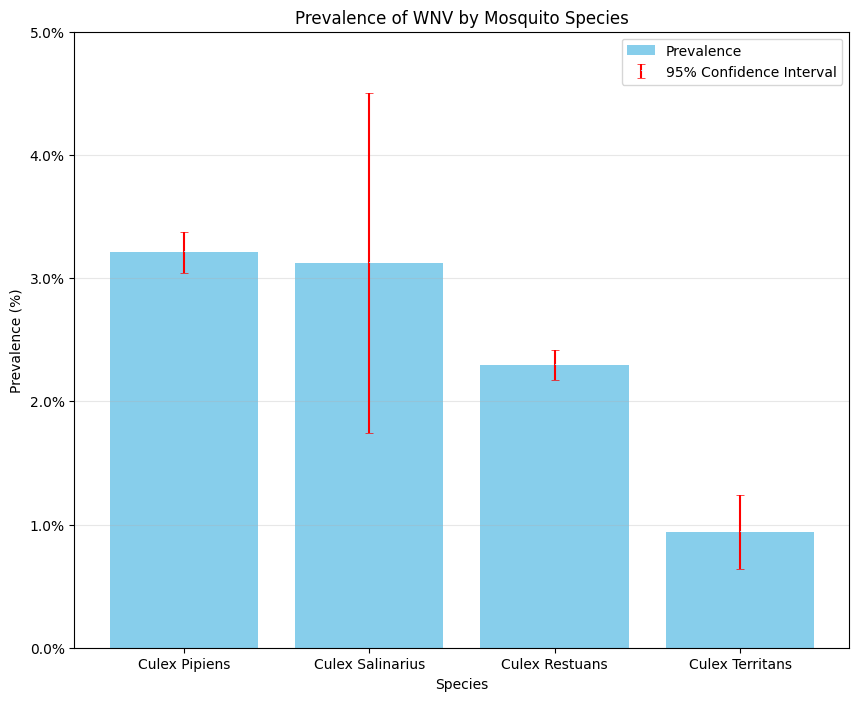

In [30]:
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(prev_group.index.str.title(), prev_group['w_mean'], color='skyblue', label='Prevalence')  
plt.errorbar(prev_group.index.str.title(), prev_group['w_mean'], yerr=prev_group['w_se'], capsize=3, capthick=.5, color='skyblue', ecolor='red', label='95% Confidence Interval', fmt=',')

plt.ylabel('Prevalence (%)') 
plt.xlabel('Species')  
plt.title('Prevalence of WNV by Mosquito Species') 
plt.grid(axis='y', alpha=.3)  
plt.yticks(np.linspace(0, .05, 6), [f"{i}%" for i in np.linspace(0, .05, 6)*100])

plt.legend()

plt.show()  

It looks like the prevalence of WNV is the highest for the *Culex Pipiens* species with a mean of 3.2%, but it is closely followed by the *Culx Salinarius* species at mean of 3.1%. However, there were scant sample for the prevalence of WNV in the *Culex Salinarius* species so the 95% Confidence Interval error bars on the prevalence calculation are very wide. Finally, we can see that *Culex Restuans* and *Culex Territans* have a much lower prevalence of WNV at 2.2% and 0.9% respectively. 

This means that if we were to target a species of mosquito in an attempt to reduce WNV transmission we would opt to reduce the population of *Culex Pipiens* mosquitos. However, we should also be aware that the *Culex Salinarius* species may also be a good target for WNV reduction.


### <a id='toc1_5_2_'></a>[3.2 Visual Exploration: Number of Mosquitos Caught and Trap Type.](#toc0_)


In order to evaluate the effectiveness of each trap, I wanted to calculate the average number of mosquitoes caught per check, a metric I'll refer to as **trap efficacy** and is defined as $\frac {sum(mosquito-number)} {instances}$. However, the dataset presented a challenge: each trap check was divided into multiple entries based on the different mosquito species present, and any trap that caught more than 50 mosquitoes was split into multiple rows. Another level of complexity was added when I realized that overflow entries could be any value, not just multiple groups of 50 plus one group of the remaining mosquitos. To get an accurate measure of each trap's efficacy, I needed to consolidate all these split entries.

To achieve this, I grouped the data by date, address, latitude, longitude, trap ID, and trap type. This grouping strategy allowed me to aggregate all the entries related to a single trap check, regardless of the mosquito species present or the number of mosquitoes caught. I then calculated the mean number of mosquitoes caught for each trap type to determine its trap efficacy.

The resulting plot, shown with the work below, provides a visual representation of the average efficacy of each trap type.


In [31]:
groupby_mosq_num = dirty_mosq_data.groupby(['Date', 'Address Block', 'Lat', 'Lon', 'Trap', 'Trap type'])['Mosquito number']\
    .sum().sort_values().reset_index().copy()
    
groupby_mosq_num['Date'] =pd.to_datetime(groupby_mosq_num['Date'])

grouped_trap_type = groupby_mosq_num.groupby('Trap type')['Mosquito number']\
    .agg([ 'mean', 'median']).sort_values(by='mean', ascending=False)



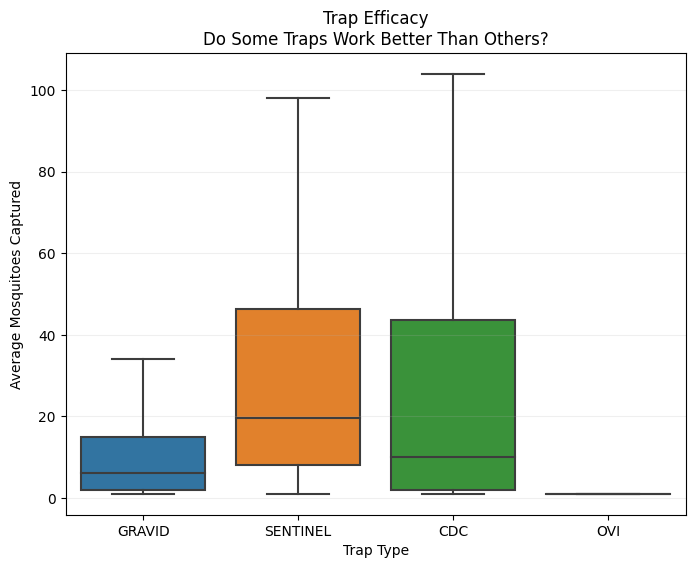

,mean,median
Trap type,,
SENTINEL,29.848837,19.5
CDC,28.266447,10.0
GRAVID,12.211785,6.0
OVI,1.000000,1.0


In [32]:
# Create the boxplot with means
sns.boxplot(data=groupby_mosq_num, x='Trap type', y='Mosquito number', showfliers=False)

# Set x and y labels
plt.xlabel('Trap Type')
plt.ylabel('Average Mosquitoes Captured')
plt.title('Trap Efficacy\nDo Some Traps Work Better Than Others?')
plt.grid(axis='y', alpha=.2) 

# Show the plot
plt.show()

grouped_trap_type

This shows that the Sentinel Traps are the most effective traps per instance, with the highest median mosquito captures of all the trap types of 19.5. CDC is the second most effective trap type with a median of 10, with an Upper Limit that is even higher than it the Sentinel Traps. The Gravid traps are the least effective traps per instance, with the its score of 6 making it the least efficacious all the trap types. The Ovi traps don't have enough data to make a good conclusion about their efficacy. 

However, I wanted to know if these traps maybe worked better in different seasons. For example, the Gravid trap might be more effective during mating season or the CDC trap might be more effective during the summer. To answer this question, I plotted the trap efficacy by month. 

,Trap type,Date,mean
12,OVI,6,1.000000
13,SENTINEL,6,9.666667
14,SENTINEL,7,21.020833
15,SENTINEL,8,36.342105
16,SENTINEL,9,31.071429


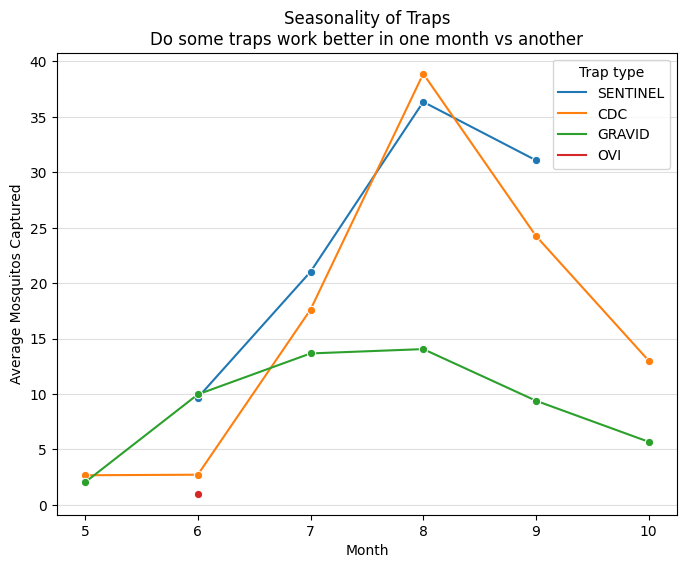

In [33]:

monthly_trap_average = groupby_mosq_num.groupby(['Trap type', groupby_mosq_num.Date.dt.month])['Mosquito number'].agg(['mean']).reset_index()

sns.lineplot(x=monthly_trap_average.Date, y=monthly_trap_average['mean'], hue=monthly_trap_average['Trap type'], \
    hue_order=['SENTINEL', 'CDC', 'GRAVID', 'OVI'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Mosquitos Captured')
plt.title('Seasonality of Traps\nDo some traps work better in one month vs another')
plt.grid(axis='y', alpha=.4)

monthly_trap_average.tail(5)


This graph gives us an idea of which trap is the most effective during each season. It looks like the Gravid traps are relatively consistent throughout the whole season, averaging around 12 mosquitos caught per check. The CDC and the Sentinel traps are strong performers in the summer months from July to September peaking at almost 35-40 mosquitos per check during the month of August. It does however appear that the CDC trap is much less effective in the spring months, than its counterpart, the gravid trap. The Ovi traps are the least effective traps.

Health department should consider putting out more of the Sentinel and CDC traps, especially during the summer, while using the Gravid traps in the spring to get an early idea of how severe the WNV prevalence will be that mosquito season.



### <a id='toc1_5_3_'></a>[3.3 Visual Exploration: Timeline and Geographical Heatmap of Prevalence](#toc0_)

For the final visualization, I aimed to accomplish two objectives: A timline and greographical heatmap of the prevalence of WNV.

#### <a id='toc1_5_3_1_'></a>[3.3.1 Timeline of Yearly West Nile Virus Prevalence](#toc0_)

   a. To plot the change in prevalence over time I grouped by batch size and year to determine the prevalence for each batch size in that year. After getting the prevalence for each batch in that year, I took a weighted mean and found the average overall prevalence for each year. 

In [34]:
# group by year and mosquito number, calculate proportion of wnv_present
prev_df_year = mosq_df.groupby(['mosquito_number', mosq_df.date.dt.year])['wnv_present'].agg(['mean', 'count']).reset_index()

prev_df_year['count'] = prev_df_year['count'].apply(lambda x: np.nan if x < 1 else x )

prev_df_year = prev_df_year.dropna()

# then calculate prevalence and prevalence of not occurring
prev_df_year['not_prevalence'] = (1-prev_df_year['mean'])**(1/prev_df_year['mosquito_number'])

prev_df_year['prevalence'] = 1-prev_df_year.not_prevalence

prev_df_year[prev_df_year.date==2012].tail(5)


,mosquito_number,date,mean,count,not_prevalence,prevalence
523,44,2012,0.000000,1,1.000000,0.000000
544,46,2012,0.900000,10,0.951176,0.048824
555,47,2012,0.000000,3,1.000000,0.000000
564,48,2012,0.000000,1,1.000000,0.000000
584,50,2012,0.555556,18,0.983912,0.016088


In [35]:
# weighted means function and application

year_aggregator = prev_df_year.groupby('date').apply(weighted_func).sort_index()

year_aggregator

,w_mean,w_std,w_se,weight
date,,,,
2007,0.026953,0.014675,0.002075,300.0
2008,0.006101,0.011516,0.002005,198.0
2009,0.003938,0.008429,0.001350,234.0
2010,0.014666,0.019727,0.003044,252.0
2011,0.008161,0.011991,0.001713,294.0
2012,0.124639,0.262300,0.040000,258.0
2013,0.028612,0.021016,0.002972,300.0
2014,0.020023,0.012710,0.001797,300.0
2015,0.021359,0.017332,0.002555,276.0


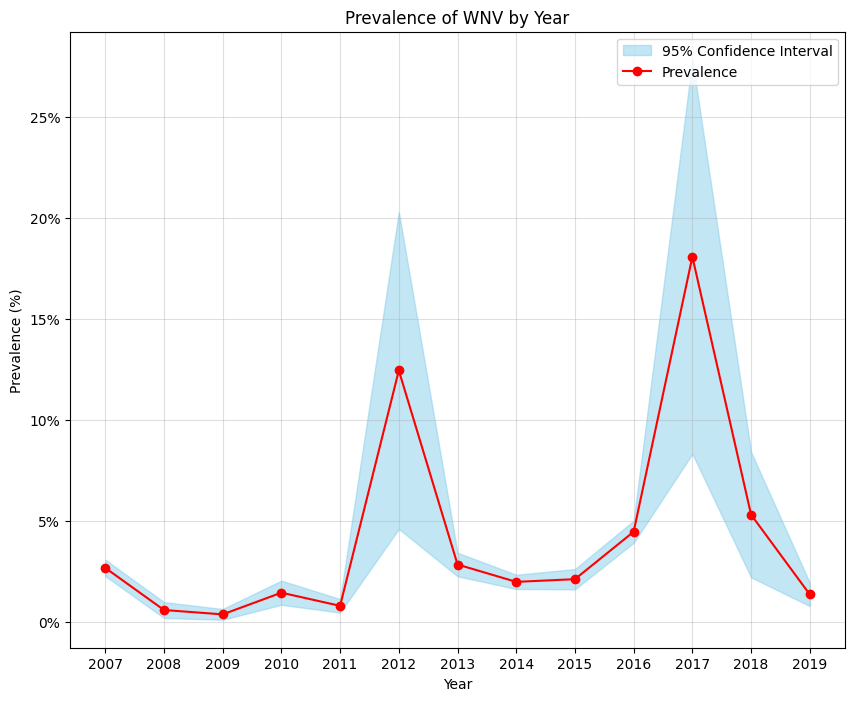

In [36]:
plt.figure(figsize=(10, 8))  
plt.fill_between(year_aggregator.index, year_aggregator['w_mean'] - 1.96*year_aggregator['w_se'],\
    year_aggregator['w_mean'] + 1.96*year_aggregator['w_se'], color='skyblue', alpha=0.5, label='95% Confidence Interval')

plt.plot(year_aggregator.index, year_aggregator['w_mean'], color='red', label='Prevalence', marker='o')

plt.ylabel('Prevalence (%)') 
plt.xlabel('Year')  
plt.title('Prevalence of WNV by Year') 
plt.grid(axis='both', alpha=.4)  
plt.yticks(np.linspace(0, .25, 6), [f"{round(i)}%" for i in np.linspace(0, .25, 6)*100])
plt.xticks(year_aggregator.index, year_aggregator.index)

plt.legend()

plt.show()  


This reveals an interesting trend: a slow increase in baseline prevalence from 2007-2019 with major spikes in 2012 and 2017. Upon further investigation, I found that Chicago experienced WNV outbreaks in [2012](https://www.cdc.gov/media/releases/2013/a0513-west-nile.html), but I didn't see any outbreak in [2017](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html). This discrepancy would motivate me to double check my numbers against other analysis if I was using this to advice policy. Nevertheless, there may be interesting factors in the years 2012 and 2017 that health officials might want to look into more if they want to predict future outbreaks.


#### <a id='toc1_5_3_2_'></a>[3.3.2 Chloropleth Map of Prevalence by Zipcode](#toc0_)

   a. For the final geoplot of prevalence, I used the `geopy` library with the `Nominatim` api to assign each longitude and latitude a zipcode. I then used the downloaded Chicago's geographical data in GeoDataFrame from `geopandas` and plotted a prevalence heatmap by zipcode with `geopandas`'s plot functions. 


This is the code used to fetch the zipcodes for each lat/lon pair - it took 45 minutes to run. I saved my work into a pickle file called `zipcode_df.pkl` so I wouldn't have to run this code again.


In [37]:

# zipcode_df = mosq_df[['lat', 'lon']].value_counts().reset_index().copy()
# zipcode_df['zipcode'] = ''

# geolocator = Nominatim(user_agent="myGeocoder")
# unable_to_find = []

# for i, row in tqdm(zipcode_df.iterrows()):
#     try:
#         location = geolocator.reverse([row['lat'], row['lon']], exactly_one=True)
#         zipcode_df.loc[i, 'zipcode'] = location.raw['address']['postcode']
#     except:
#         print(f'Was unable to retrieve zip code for {i}:{row.lat}, {row.lon}')
#         unable_to_find.append(i)
#     time.sleep(1)


# exporting and saving the dataframe

# zipcode_df.to_pickle('zipcode_df.pkl')


In [38]:
# new dfs with zipcodes
stored_zips = pd.read_pickle('Data/zipcode_df.pkl').drop(0, axis=1)

mosq_df_with_zip = pd.merge(mosq_df, stored_zips, on=['lat', 'lon'], how='left')

mosq_df_with_zip.tail()

,week,address_block,trap,trap_type,date,mosquito_number,wnv_present,species,lat,lon,zipcode
18490,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,True,CULEX PIPIENS,41.857843,-87.635858,60616
18491,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,True,CULEX PIPIENS,41.965376,-87.758403,60630
18492,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,True,CULEX RESTUANS,41.662395,-87.590176,60633
18493,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,True,CULEX RESTUANS,41.919197,-87.664758,60614
18494,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,True,CULEX RESTUANS,41.979069,-87.906570,60666


In [39]:
# group by year and mosquito number, calculate proportion of wnv_present
zippy_mosq_df = mosq_df_with_zip.groupby(['mosquito_number', 'zipcode'])['wnv_present'].agg(['mean', 'count', 'std']).reset_index().dropna()

zippy_mosq_df['count'] = zippy_mosq_df['count'].replace(0, np.nan)

zippy_mosq_df = zippy_mosq_df.dropna()

# then calculate not-prevalence and prevalence
zippy_mosq_df['not_prevalence'] = (1-zippy_mosq_df['mean'])**(1/zippy_mosq_df['mosquito_number'])

zippy_mosq_df['prevalence'] = 1-zippy_mosq_df.not_prevalence

# weighted average function
zippy_mosq_df = zippy_mosq_df.groupby('zipcode').apply(weighted_func).reset_index()


In [40]:


# Load a GeoDataFrame with the boundaries of Chicago's zip codes
zipcodes = gpd.read_file('shpfiles\geo_export_550ff9f7-fae6-4491-9e69-77ab0f21d9e8.shx')

# Merge your data with the GeoDataFrame based on the zipcode
merged = pd.merge(zipcodes, zippy_mosq_df, right_on = 'zipcode', left_on='zip', how = 'inner')
merged.tail()

,objectid,shape_area,shape_len,zip,geometry,zipcode,w_mean,w_std,w_se,weight
46,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",60623,0.081423,0.202883,0.038341,196.0
47,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",60629,0.195625,0.345699,0.057616,252.0
48,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",60620,0.111696,0.275302,0.044660,266.0
49,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",60637,0.036810,0.057829,0.021857,49.0
50,61.0,1.678720e+08,53040.907078,60619,"POLYGON ((-87.58592 41.75150, -87.58592 41.751...",60619,0.023528,0.025292,0.004215,252.0


In [41]:
# Plot the heatmap
merged.plot(column='w_mean', cmap='OrRd', scheme="quantiles",\
    k=4, edgecolor='k', linewidth=0.5, legend=True, legend_kwds={'loc': 'lower left', 'title': 'Prevalence (%)'})

# # Set the title and colorbar labels
plt.title('Chicago Hot Spots\nPrevalence of West Nile Virus by Zipcode', fontsize=16)

# Remove the axis ticks
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show();

This graphic show that their is a quite a few hot spots throughout the city where the prevalence of WNV is greater than 16% on average. The city of chicago should like aim their efforts at WNV infection awareness and bug repellant distribution in these areas. Beyond that, the city should also consider spraying for mosquitos in these areas and attempting to remove mosquito breeding grounds.

This map was partially inspired by the [GeoPandas documentation](https://geopandas.org/en/stable/gallery/choropleths.html).